In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/User/Desktop/epa-sea-level.csv")

In [4]:
df.shape

(134, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [6]:
# get the number of missing data points per column
missing = df.isnull().sum()
# how many total missing values do we have?
cells = np.product(df.shape)
total_missing = missing.sum()

# percent of data that is missing
percent_missing = (total_missing/cells) * 100
percent_missing
# fill null values
df=df.fillna(0)
df.head(16)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,0.0
1,1881,0.220472,-0.732283,1.173228,0.0
2,1882,-0.440945,-1.346457,0.464567,0.0
3,1883,-0.232283,-1.129921,0.665354,0.0
4,1884,0.590551,-0.283465,1.464567,0.0
5,1885,0.531496,-0.330709,1.393701,0.0
6,1886,0.437008,-0.381890,1.255906,0.0
7,1887,0.216535,-0.602362,1.035433,0.0
8,1888,0.299213,-0.519685,1.118110,0.0
9,1889,0.362205,-0.456693,1.181102,0.0


<AxesSubplot:title={'center':'Scaled data'}, ylabel='Count'>

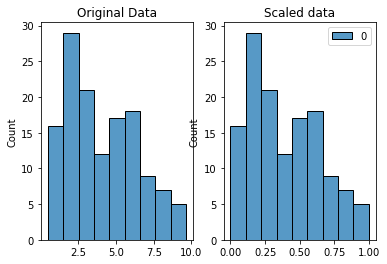

In [7]:
import mlxtend
import seaborn as sns
import matplotlib.pyplot as plt 
occupancy = df.loc[:,"Upper Error Bound"]
original= np.array(occupancy)
from mlxtend.preprocessing import minmax_scaling
scaled_data = minmax_scaling(original, columns=[0])
fig,ax = plt.subplots(1,2)
ax[0].set_title("Original Data")
ax[1].set_title("Scaled data")
sns.histplot(original, ax=ax[0])
sns.histplot(scaled_data, ax=ax[1])

Text(0.5, 1.0, 'Normalized data')

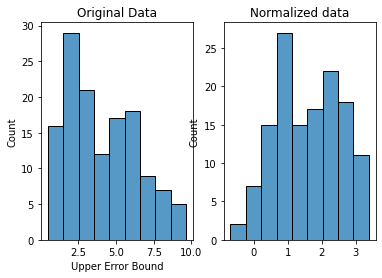

In [8]:
from scipy import stats
reserved = df[ df["Upper Error Bound"]>0]
reserved = reserved.loc[:,"Upper Error Bound"]
reserved1 = np.array(reserved)
normalized_data = stats.boxcox(reserved)
fig, ax=plt.subplots(1,2)
sns.histplot(reserved, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

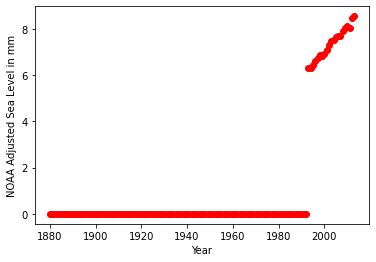

In [9]:
plt.plot(df['Year'], df['NOAA Adjusted Sea Level'], 'ro')
plt.ylabel('NOAA Adjusted Sea Level in mm')
plt.xlabel('Year')
plt.show()

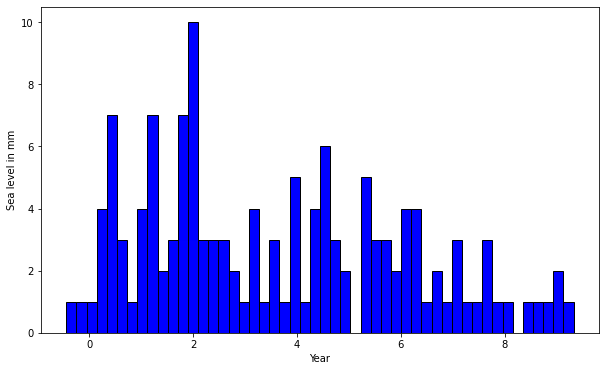

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['CSIRO Adjusted Sea Level'], bins=50, ec='black', color='blue')
plt.ylabel('Sea level in mm')
plt.xlabel('Year')
plt.show()

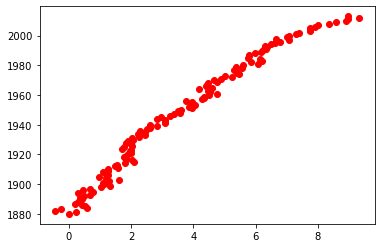

In [11]:
plt.plot(df['CSIRO Adjusted Sea Level'], df['Year'], 'ro')
plt.show()

# Create scatter plot

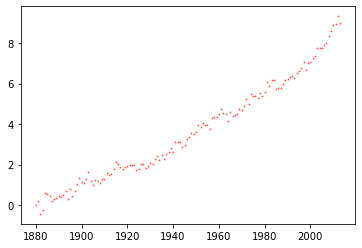

In [12]:
x = df.loc[:,"Year"]
y = df.loc[:,"CSIRO Adjusted Sea Level"]
area = 1
plt.scatter(x,y,s=area,alpha=0.5,color = "red")

# Create first line of best fit

Text(0.5, 1.0, 'Rise in Sea level')

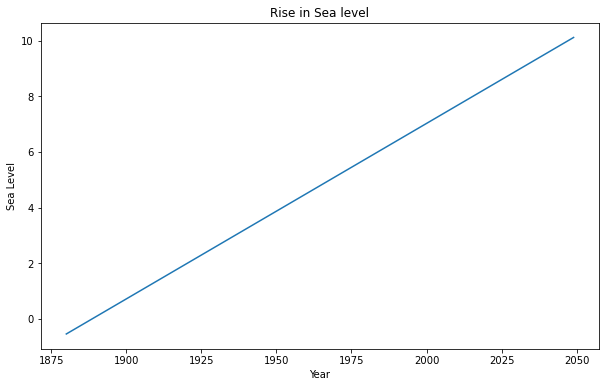

In [13]:
lineA = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
xA = np.arange(df['Year'].min(),2050,1)

yA = xA*lineA.slope + lineA.intercept
plt.figure(figsize=(10, 6))
plt.plot(xA,yA)
plt.xlabel("Year")
plt.ylabel("Sea Level")
plt.title("Rise in Sea level")

# Create second line of best fit

Text(0.5, 1.0, 'Rise in Sea level')

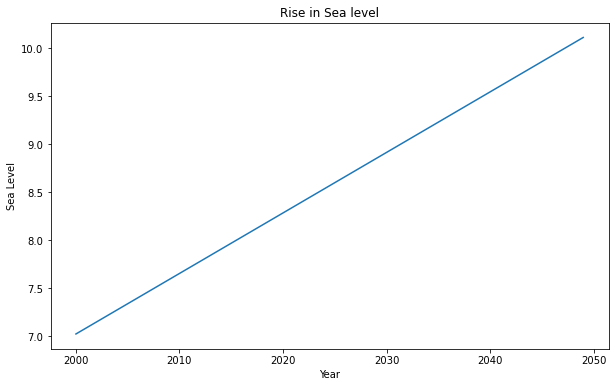

In [16]:
lineB = stats.linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
xB =  np.arange(2000,2050,1)
yB = xB*lineB.slope + lineB.intercept
plt.figure(figsize=(10, 6))
plt.plot(xB,yB)

plt.xlabel("Year")
plt.ylabel("Sea Level")
plt.title("Rise in Sea level")

# Some predicts with scikit learn

In [15]:
from sklearn.linear_model import LinearRegression
X=df[["Year"]]
y=df[["CSIRO Adjusted Sea Level"]]
model = LinearRegression().fit(X,y)

In [17]:
model.score(X,y)

0.9697466074149553

In [18]:
model.predict(np.array([2020]).reshape(-1, 1))

array([[8.28411774]])